This is going to be a short tutorial on SMV with scikit learn

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy import stats
import pylab as pl

SVM set boundaries between clusters of data. SVMs attempt to maximize the margine between sets of points. Many boundaries can be used to separate the points.

(-1, 3.5)

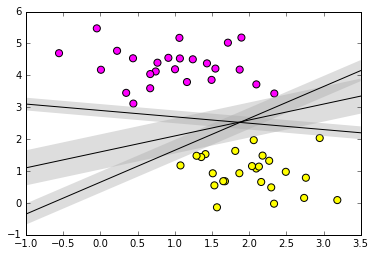

In [12]:
from sklearn.datasets.samples_generator import make_blobs

# Notice how there is always an X and a y when dealing with ML
X, y = make_blobs(n_samples = 50, centers = 2, random_state=0, cluster_std = 0.60)

# What this says is I want all the elements from the list, but only
# the first elements or second element.
# print X[:, 0], print X[:, 1]

# np.linspace --> Return evenly spaced numbers over a specified interval.
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap ='spring')

# Draw three lines that couple separate the data
# Nothing to do with ML, but simple regression
# m = slope; b = y int; d = error bars
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yhat = m * xfit + b
    plt.plot(xfit, yhat, '-k')
    plt.fill_between(xfit, yhat - d, yhat + d, edgecolor='none', color='#AAAAAA', alpha=0.4)

# Notice how this is the same dimentions as np.linspace?
plt.xlim(-1, 3.5)

Now you need to fit the model to the data. Remeber fit then predict.

In [13]:
from sklearn.svm import SVC

# clf is a statistical model that has parameters 
# that control the learning algorithm
clf = SVC(kernel = 'linear')
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

Lets plot the boundary

In [15]:
# Remember you created the clf model above using SVC from sklearn

def plot_svc_decision_function(clf, ax=None):
    """Plot the decision function for a 2D SVC"""
    
    if ax is None:
        # gca() --> get current axis
        ax = plt.gca()
    
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    
    # Meshgrid() --> create and array
    Y, X = np.meshgrid(y, x)
    
    # zeros_like() --> Return an array of zeros with the 
    # same shape and type as a given array.
    P = np.zeros_like(X)
    
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.decision_function([xi, yj])
    
    # plot the margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

Do any of the dashed lines touch a couple of the points? These would be know as support vectorsm which are stored in the support_ectors_ attribute classifier

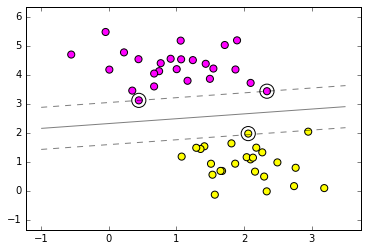

In [16]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolors='none');

Kernsels are useful when the decision boundary is not linear. A kernel is some functional transformation of the input data. SVMs have clever tricks to ensure kernel calculations are efficient. In the example below, a linear boundary is not useful in spearating the groups of points.

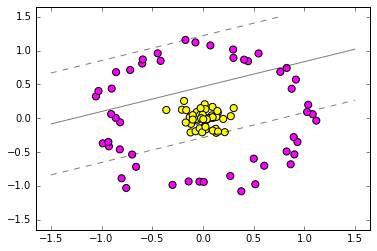

In [17]:
from sklearn.datasets.samples_generator import make_circles

# Notice how this is circles, not blobs
X, y = make_circles(100, factor=.1, noise=.1)

# I am assuming linear is not a good approximation for circles
clf = SVC(kernel='linear').fit(X, y)

# cmap() --> a colormap or registered colormap name
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(clf);

Maybe this will work in 3d?

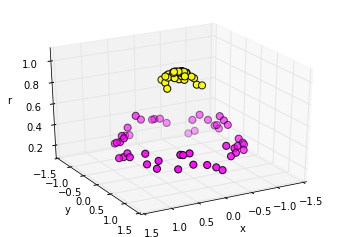

In [19]:
from IPython.html.widgets import interact

# Changing the values to their squares
r = np.exp(-(X[:, 0] ** 2 + X[:, 1] ** 2))

from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='spring')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

# This allows you to edit in real time the data spit out.
# Very cool
interact(plot_3D, elev=[-90, 90], azip=(-180, 180));

I can see a clear seperation of the data.

Now lets find where the support vectors are at.

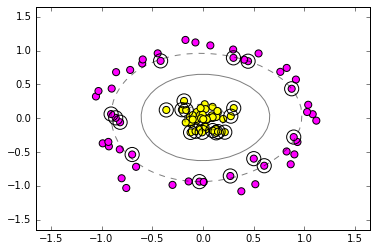

In [20]:
clf = SVC(kernel='rbf')
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolors='none');

What is RBF -- In machine learning, the (Gaussian) radial basis function kernel, or RBF kernel, is a popular kernel function used in various kernelized learning algorithms. In particular, it is commonly used in support vector machine classification.